In [15]:
%matplotlib inline

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

import pywt
import pywt.data

In [49]:
Xtr = genfromtxt('../data/Xtr.csv', delimiter=',')
Ytr = genfromtxt('../data/Ytr.csv', delimiter=',')
Xte = genfromtxt('../data/Xte.csv', delimiter=',')

Xtr = np.delete(Xtr, 3072, axis=1)
Xte = np.delete(Xte, 3072, axis=1)
Ytr = Ytr[1:,1]
N = len(Ytr)

In [52]:
i=5
r = Xtr[i][:1024].reshape(32,32)
g = Xtr[i][1024:2048].reshape(32,32)
b = Xtr[i][-1024:].reshape(32,32)

rgbArray = np.zeros((32,32,3), 'uint8')
rgbArray[..., 0] = (r+r.min())/(r.max()-r.min())*256
rgbArray[..., 1] = (g+g.min())/(g.max()-g.min())*256
rgbArray[..., 2] = (b+b.min())/(b.max()-b.min())*256

grayImage = 0.2989 *rgbArray[..., 0]+ 0.5870 *rgbArray[..., 1]+0.1140 *rgbArray[..., 2]
coeffs2 = pywt.dwt2(grayImage, 'bior1.3')
LL, (LH, HL, HH) = coeffs2

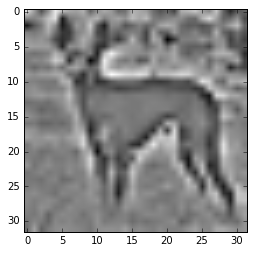

In [53]:
plt.figure()
plt.imshow(grayImage, cmap = plt.get_cmap('gray'))
plt.show()

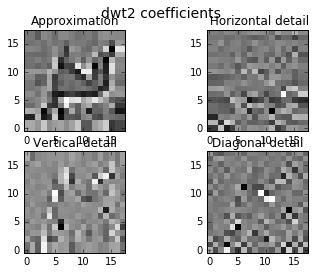

In [54]:
original = grayImage
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure()
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(a, origin='image', interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=12)

fig.suptitle("dwt2 coefficients", fontsize=14)

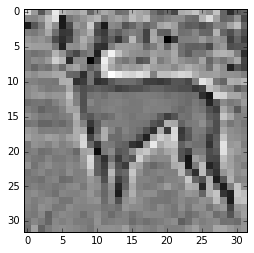

In [55]:
# Now reconstruct and plot the original image
reconstructed = pywt.idwt2(coeffs2, 'bior1.3')
fig = plt.figure()
plt.imshow(reconstructed, interpolation="nearest", cmap=plt.cm.gray)

# Check that reconstructed image is close to the original
np.testing.assert_allclose(original, reconstructed, atol=1e-13, rtol=1e-13)